In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2018.csv


In [2]:
wh2019 = pd.read_csv('../input/world-happiness/2019.csv')
wh2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Because there is no region column in 2019, so I'll get it from 2016.csv file

In [3]:
wh2016 = pd.read_csv('../input/world-happiness/2016.csv')
wh2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [4]:
#select only region column
country_wt_region = wh2016[['Country','Region']]

#Join to 2019 file
wh2019 = wh2019.merge(country_wt_region,left_on = 'Country or region',right_on = 'Country',how = 'left')

# Global View

Creating pairplot to see if there're any correlation between hapiness score and other factors

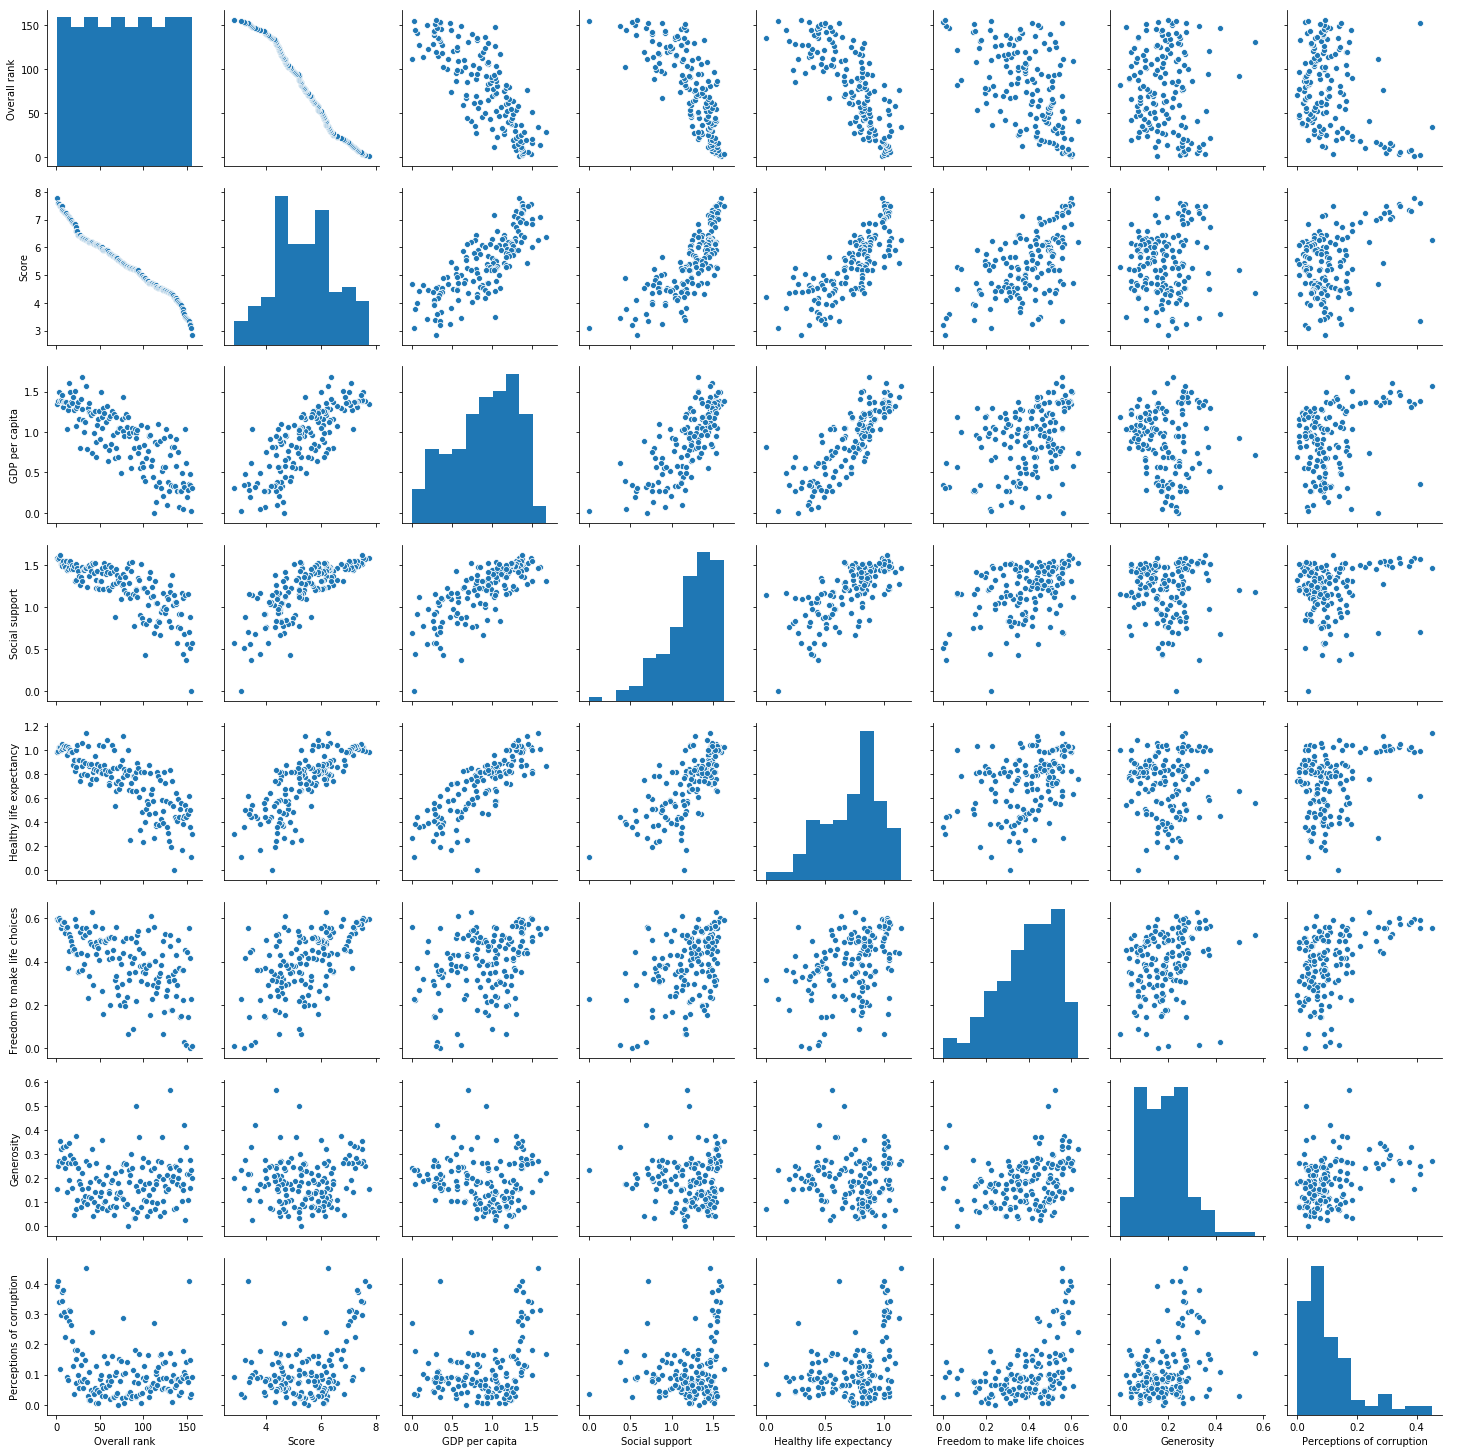

In [5]:

sns.pairplot(wh2019)


From the pairplot, we can see that some of factors has positive correlation to the hapiness score which are
- GDP per capita
- Social support
- Healthy life expectancy
- Freedom

In case of generosity and preception of corruption, it seems that they somehow correlate to the hapiness score too but I'm not sure. So I think we should calculate the correlation coeffecient to understand it more

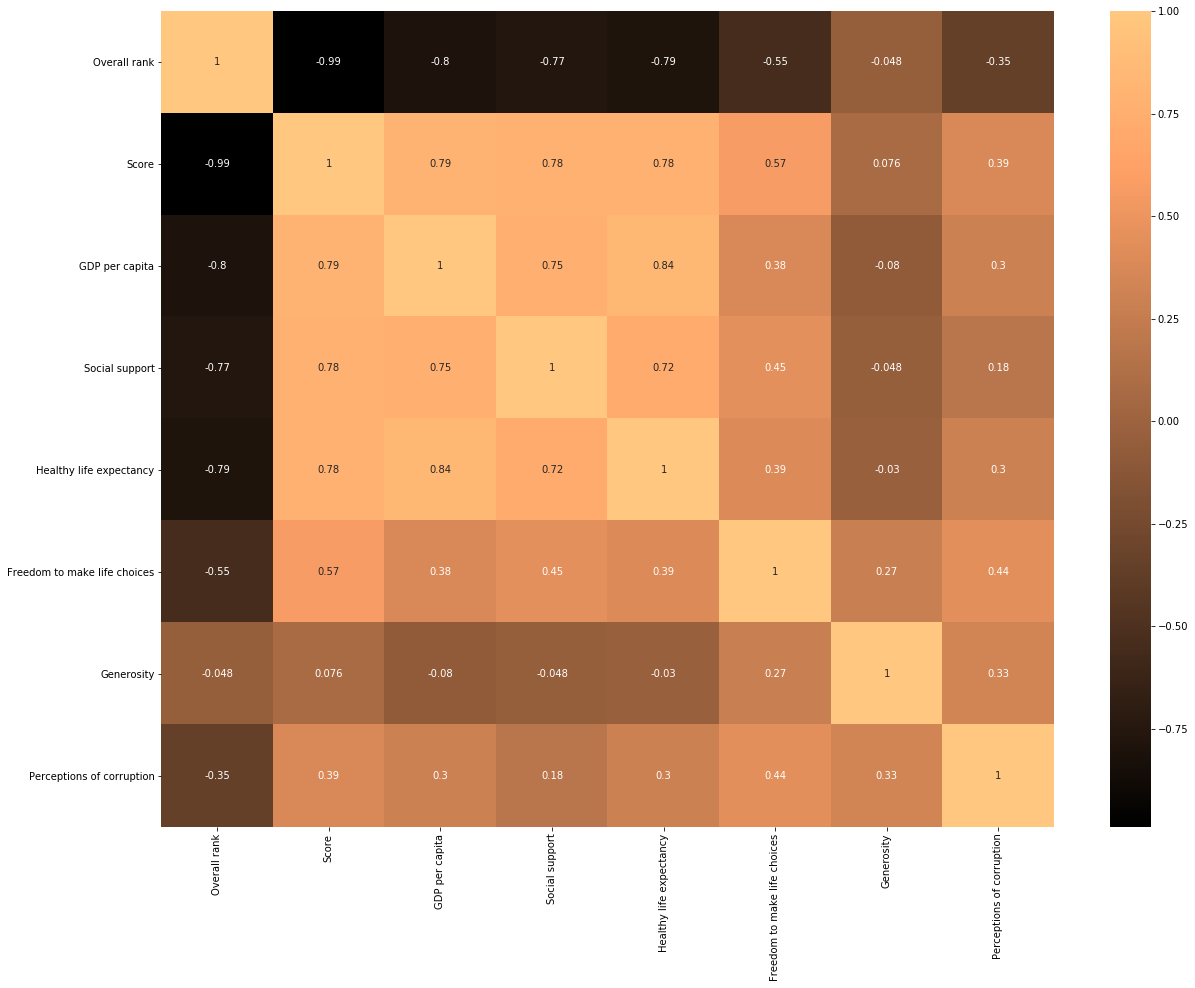

In [6]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.heatmap(wh2019.corr(), cmap = 'copper', annot = True)

plt.show()

The result of many factors are follow as we understood from the pairplot. I think it's better if we try to understand them one by one

# GDP per Capita vs Happiness : Money can't buy heppines. Really?


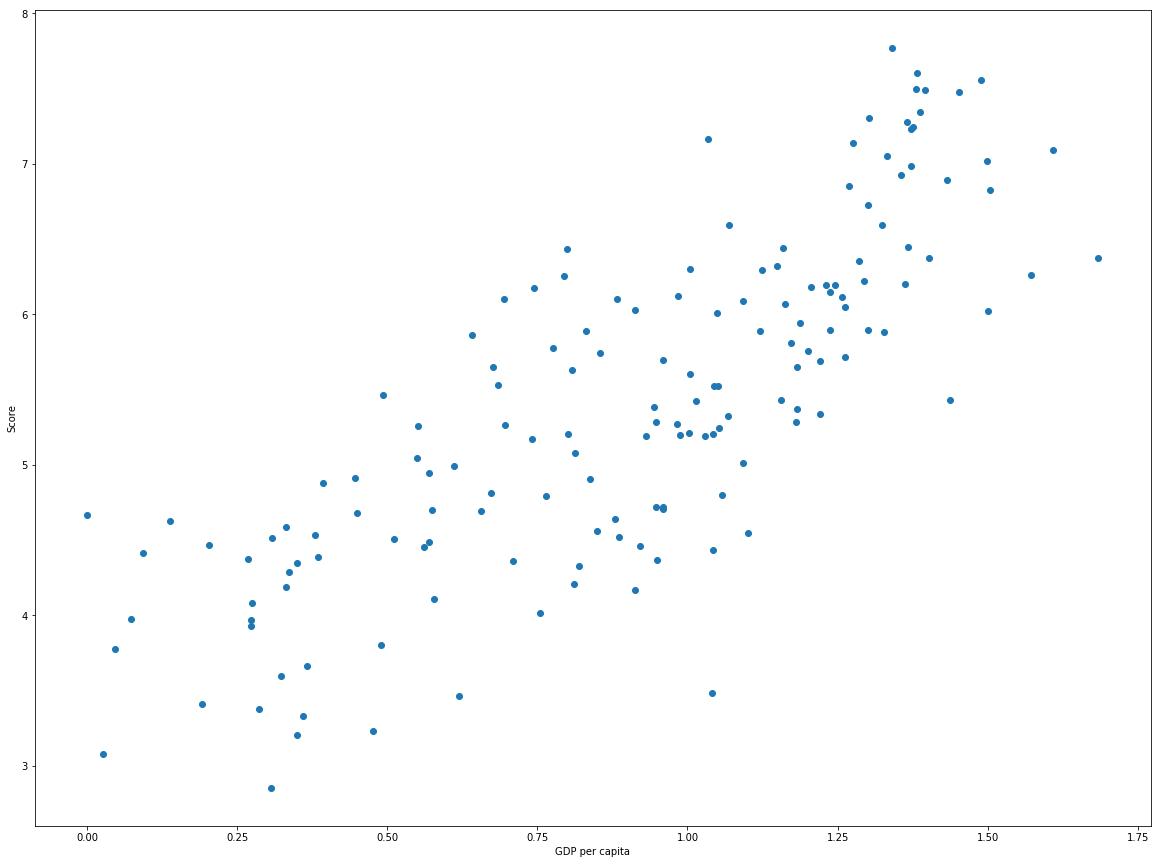

In [7]:
def plot_scatter(df,x,y):
    fig, ax = plt.subplots()
    plt.xlabel(x)
    plt.ylabel(y)
    ax.scatter(df[x],df[y])
    plt.show()
    
plot_scatter(wh2019,'GDP per capita','Score')

According to the graph, it's clear to me that GDP or wealth affect hapiness. It's true that being wealthy doesn't gaurantee happiness but most cases, it does help.

# Social Support vs Happiness : Human is a social animal.


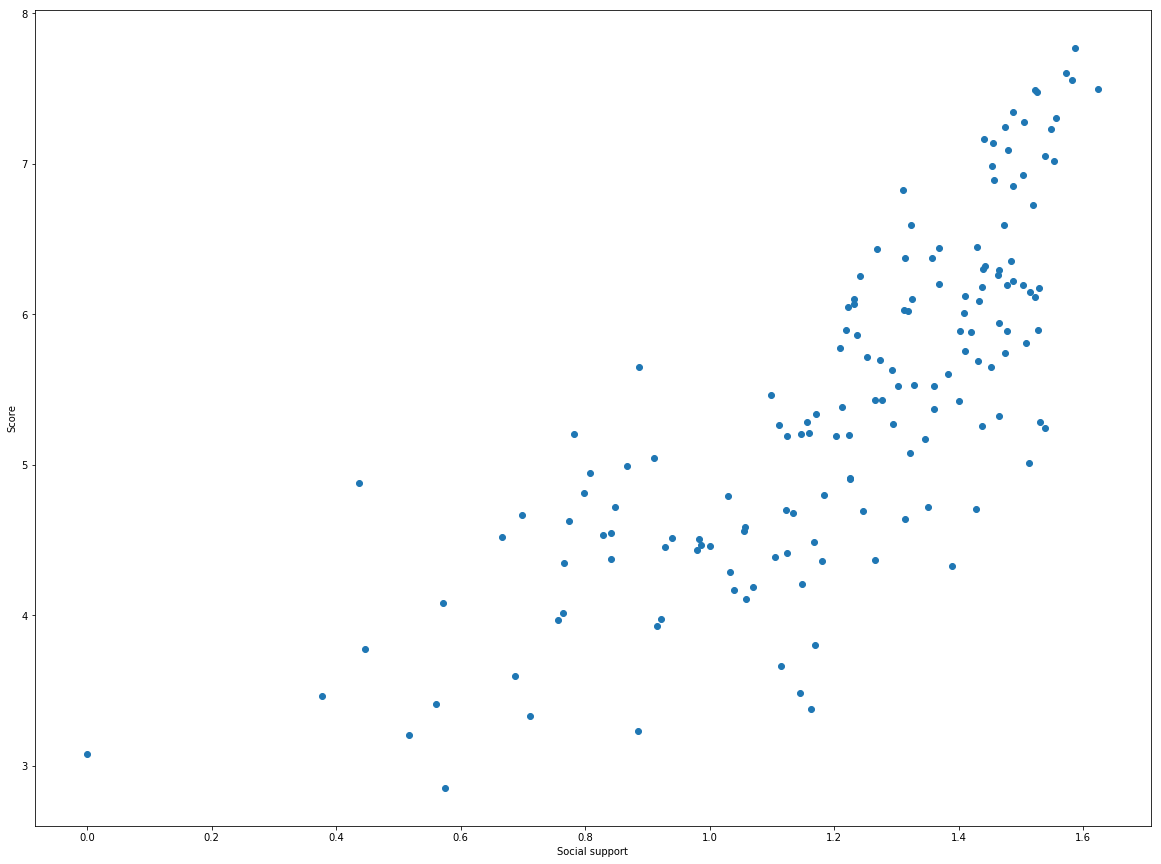

In [8]:
plot_scatter(wh2019,'Social support','Score')

The more social support they have, the more happy they are. I think this makes sense to me because we all know that human is a social animal.

What make me curious is the country that have very low social support score. Let's see what that country is.

In [9]:
wh2019[(wh2019['Social support']<0.25)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country,Region
154,155,Central African Republic,3.083,0.026,0.0,0.105,0.225,0.235,0.035,NaN,NaN


It's Central African Repuplic. But I'm not sure why the social support score is 0.0. So I look at the statistics of other columns too.

In [10]:
wh2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


All columns have minimum score at 0. So I think it's normal and the social support in the Central African Republic is really bad.

# Healthy life expectancy vs Happiness : Long and Happy Living


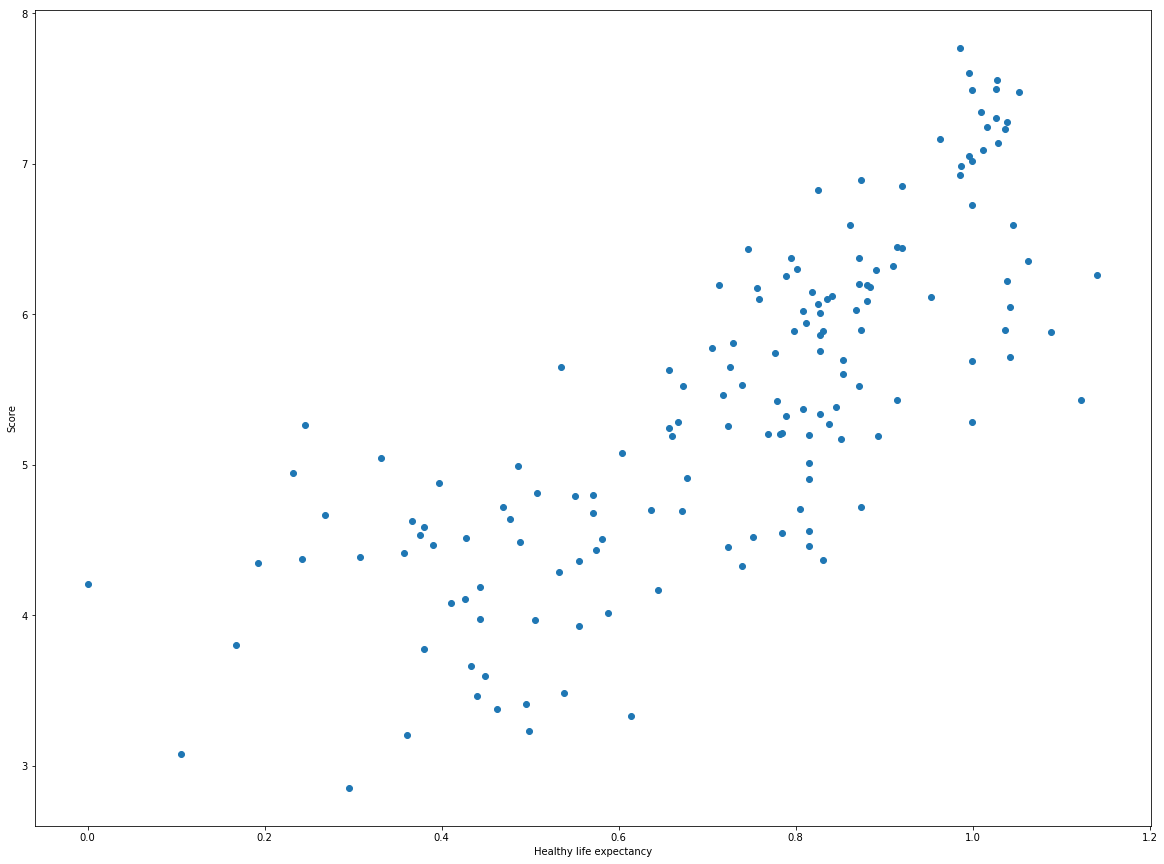

In [11]:
plot_scatter(wh2019,'Healthy life expectancy','Score')

This factor also has strong positive correlation with happiness score.

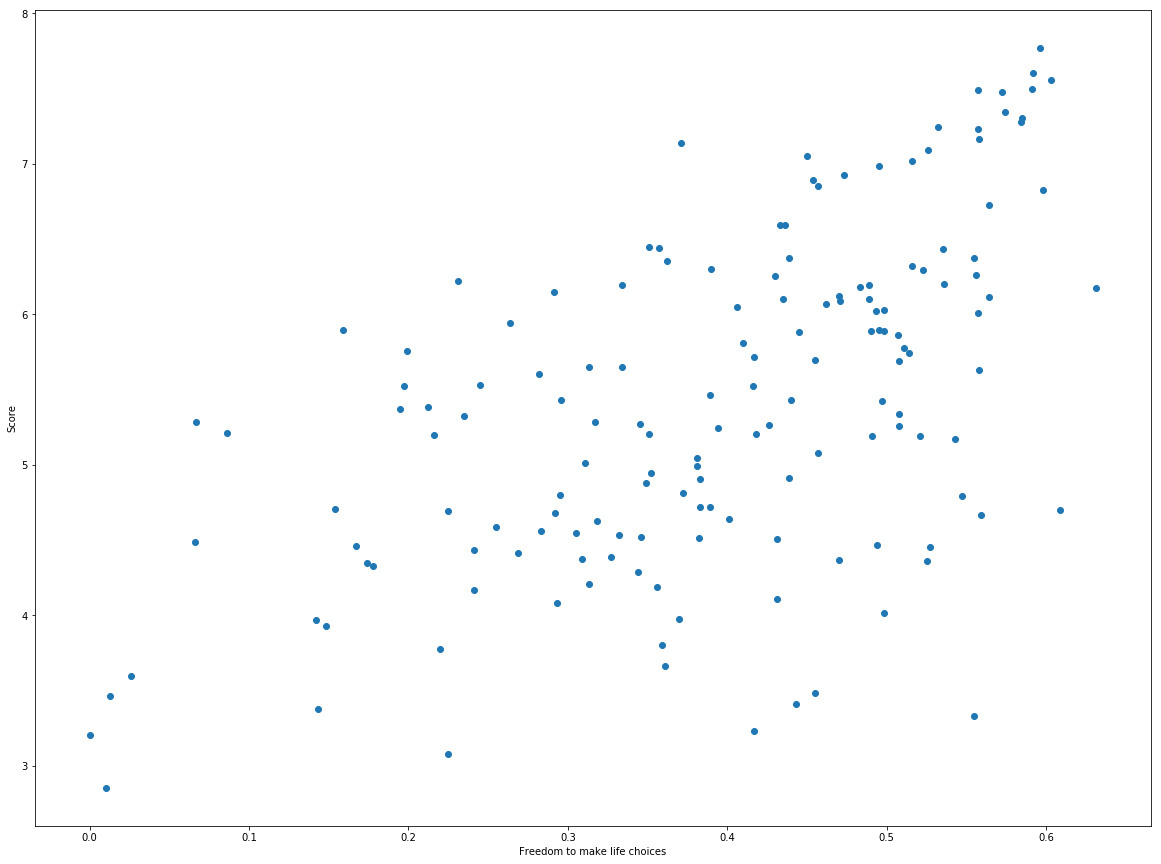

In [12]:
plot_scatter(wh2019,'Freedom to make life choices','Score')

I used to think that if there'is no freedom, I can't be happy but there is a country that has a moderate score of freedom but has high score in happiness. Let;s see what that country is.

In [13]:
wh2019[(wh2019['Freedom to make life choices']<0.4)&(wh2019['Score']>7)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country,Region
12,13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082,Israel,Middle East and Northern Africa


It's Israel! Even though the freedom score is low when compares to other country but the score in GDP, social support and healthy life are all high with greater that percentile 75 according to data statistics above. And that is why Israel has high score in happiness. 

# Generosity vs Happiness : It's not about other generosiry, it's about yours!

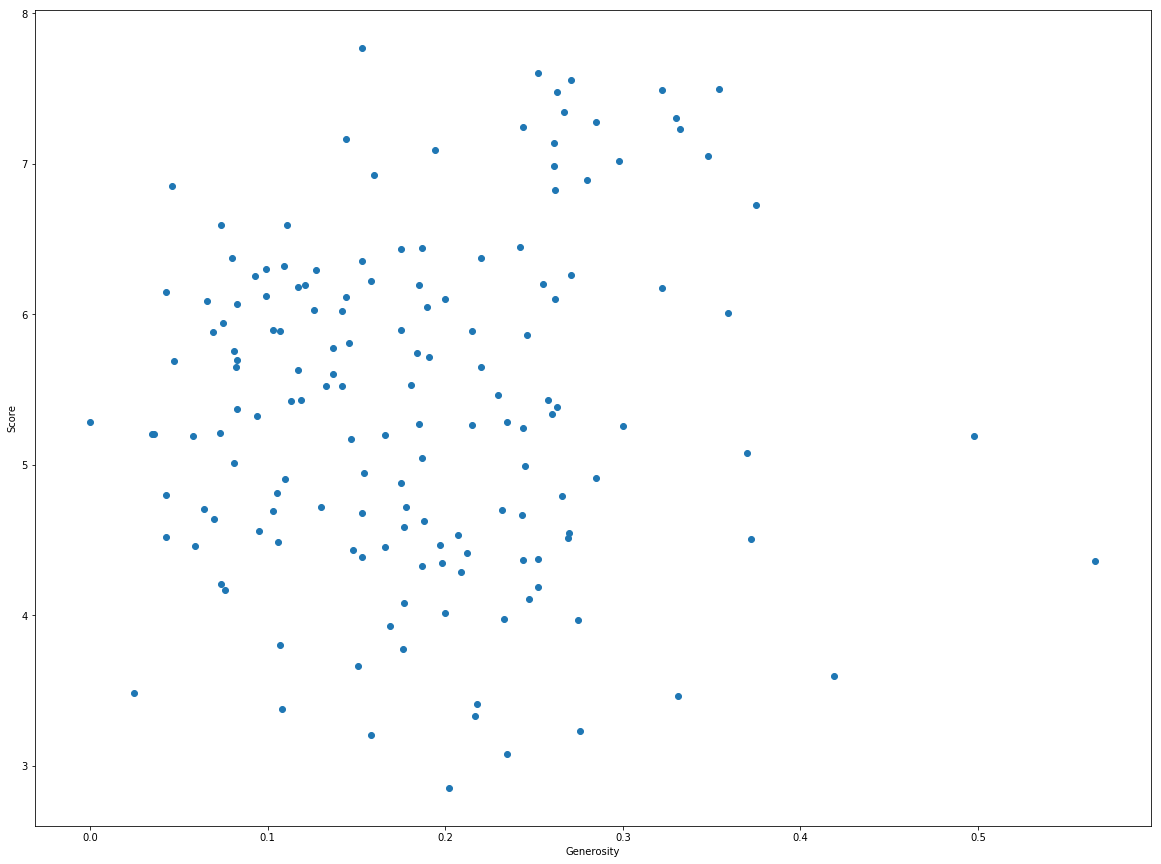

In [14]:
plot_scatter(wh2019,'Generosity','Score')

The correlation coefficient between happiness score and generosity is 0.09 which is really low, we can say that there'is almost no correlation. It's remind me of a research that I read in the past. It's about how to be happy and one of the advices they give is random act of kindness. From the result of that reseach and this one, I think that it's not about other generosity that make you happy but it's your generosity!

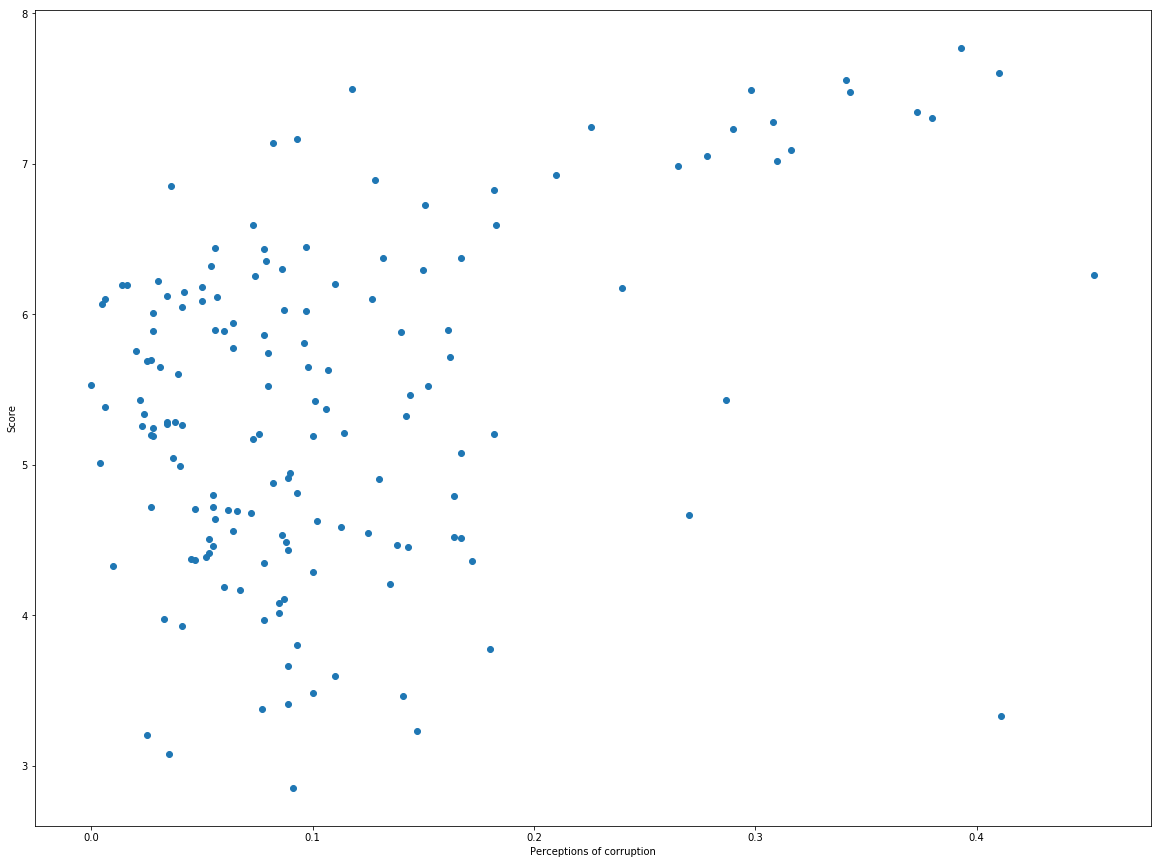

In [15]:

plot_scatter(wh2019,'Perceptions of corruption','Score')

This factor also has low correlation to the hapiness score but somehow it does help. From the graph I see that when the score is lower that 0.2, it doesn't affect heppiness much but when the score is above 0.2, the countries tend to have more happiness.

But there is a country that has high score in the factor but low in happiness score. Let's see what it is.

In [16]:
wh2019[(wh2019['Perceptions of corruption']>0.4)&(wh2019['Score']<4)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Country,Region
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Rwanda,Sub-Saharan Africa


From my opinion, the result is trustable because many things make sense in real life. I think there're things that we apply in personal life from the data.

We learned that wealth, health and social life matter for our happiness. So the question that we should ask is what make me has great wealth, great health and great social life! : )

# Regional View

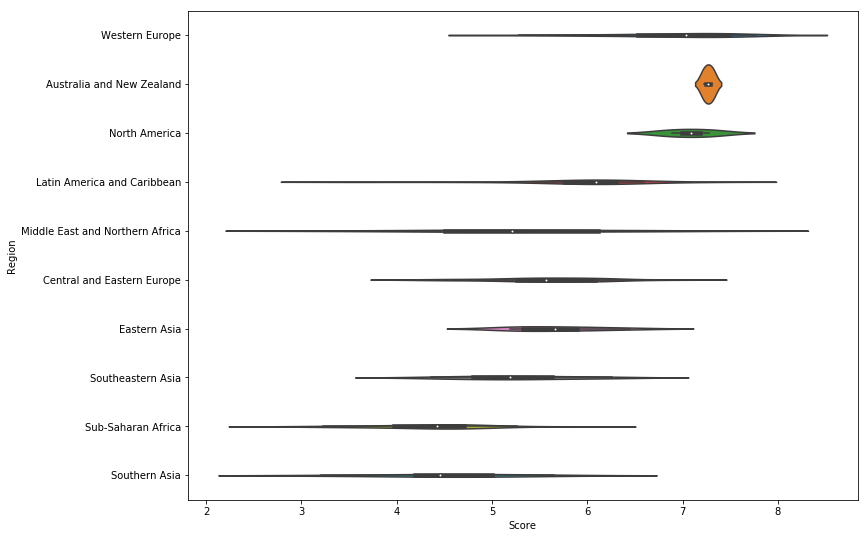

In [17]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(wh2019['Score'], wh2019['Region'])
plt.show()

> Wow! The happiness score in each region are so vary. In some region like Middle East and Northern Affrica, you can be super happy and super depress depends on which country you live.


We already learned about factors that impact to happiness in global view but does it apply to each region too? We'll pick some of them to see.

In [18]:
def create_heatmap_correlation(df):
    plt.rcParams['figure.figsize'] = (8, 6)
    sns.heatmap(df.corr(), cmap = 'copper', annot = True)
    plt.show()
wh2019.groupby(['Region'])['Country or region'].count().sort_values(ascending = False) 

Region
Sub-Saharan Africa                 35
Central and Eastern Europe         28
Western Europe                     20
Latin America and Caribbean        20
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Country or region, dtype: int64

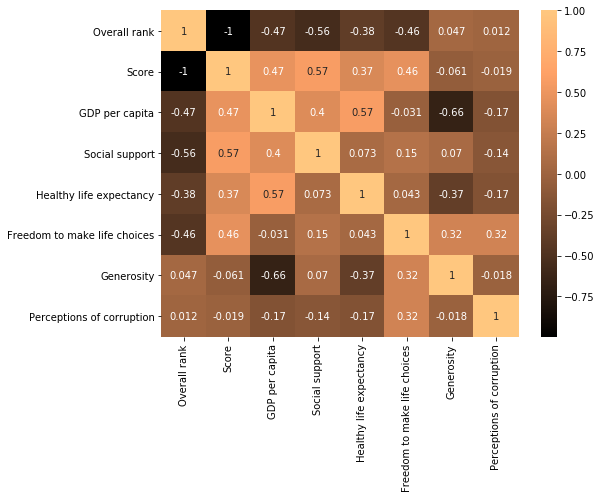

In [19]:

create_heatmap_correlation(wh2019[wh2019['Region']=='Central and Eastern Europe'])

> For the "Central and Eastern Europe", the factors tend to go the same way as global view but less correlation.

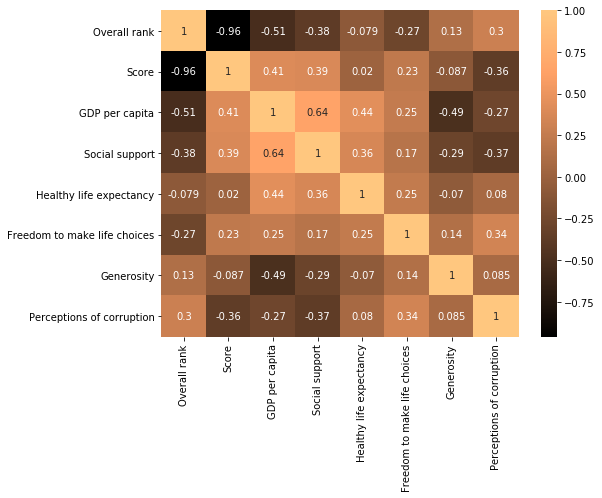

In [20]:
create_heatmap_correlation(wh2019[wh2019['Region']=='Sub-Saharan Africa'])

> For the Sub-Saharan Africa, only GDP and social support that have positive effect to the happiness. And the correlation between perception of coruption and happiness score has negative value, that's weird.

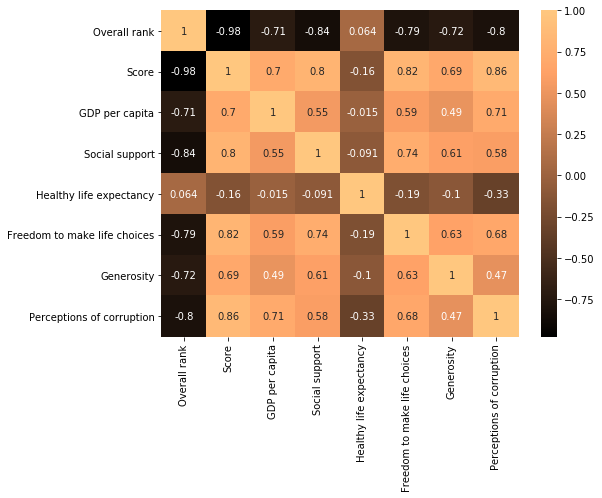

In [21]:
create_heatmap_correlation(wh2019[wh2019['Region']=='Western Europe'])

> For the "Western Europe", all factors has positive effect to the happiness except the healthy life expectancy...why?

When we compare the correlation of factors and happiness in global view and region view, we learn that people in each region has their own perception about the happiness. At first I only looked at the factors that matter in global view and it lead me to (probably) wrong summary. I think next time when I want to analyze something in deep, I should start from top and dig the data step by step. That would save me a lot of time.